# Section 1 Project

데이터 링크 
https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv

Data Description  
Name : 게임의 이름입니다.  
Platform : 게임이 지원되는 플랫폼의 이름입니다.  
Year : 게임이 출시된 연도입니다.  
Genre : 게임의 장르입니다.  
Publisher : 게임을 제작한 회사입니다.  
NA_Sales : 북미지역에서의 출고량입니다.  
EU_Sales : 유럽지역에서의 출고량입니다.  
JP_Sales : 일본지역에서의 출고량입니다.  
Other_Sales : 기타지역에서의 출고량입니다.  

---

#❗ 목표
## 다음 분기에 어떤 게임을 설계해야 할까?

### 필수 사항


*   지역에 따라서 선호하는 게임 장르가 다를까
*   연도별 게임의 트렌드가 있을까
*   출고량이 높은 게임에 대한 분석 및 시각화 프로세스






In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
url = '/content/drive/MyDrive/Colab Notebooks/vgames2.csv'
drive.mount('/content/drive/')

df = pd.read_csv(url)

df = df.drop(['Unnamed: 0'], axis=1) #unnmaed 컬럼 삭제
df = df.dropna() #nan 있는 데이터 행 다 삭제.
print(df.dtypes)
print(df.isna().sum()) # nan 있는 데이터 열의 갯수 합.
df.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Name            object
Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales        object
EU_Sales        object
JP_Sales        object
Other_Sales     object
dtype: object
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


## 데이터 전처리 진행.
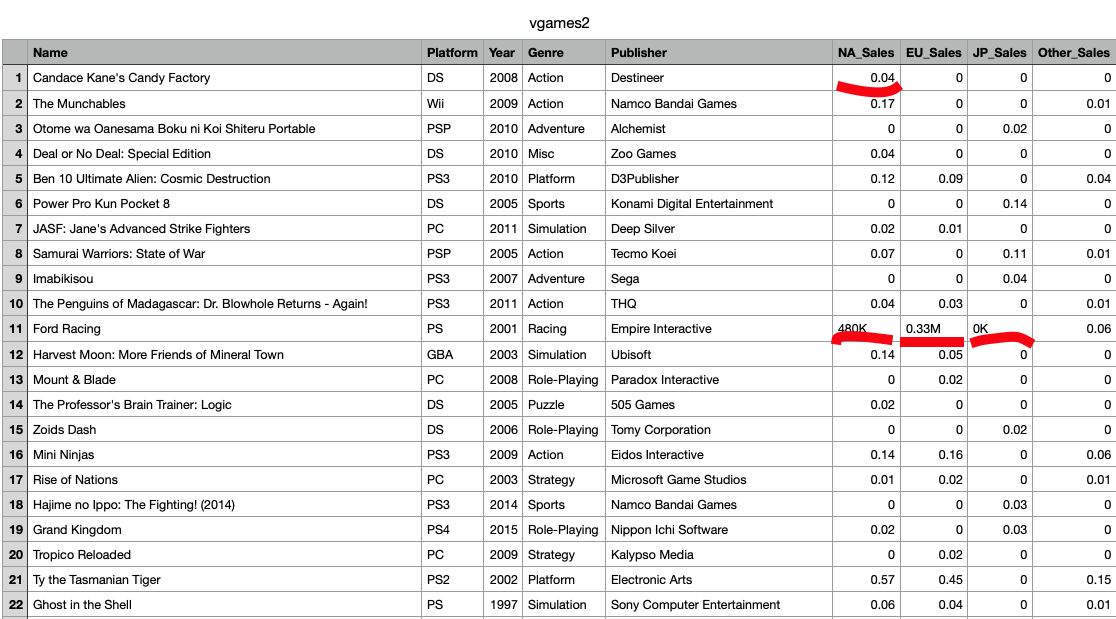


 -  데이터 각 컬럼에 null이 없는지?
 -  데이터들의 타입이 일정한지?
 -  숫자 단위들이 동일한지?

In [2]:
#플랫폼 데이터 확인
plat = df['Platform'].astype('category')
print(plat.value_counts())
print(plat.unique())

DS      2127
PS2     2121
PS3     1299
Wii     1284
X360    1231
PSP     1193
PS      1185
PC       935
XB       799
GBA      784
GC       541
3DS      498
PSV      409
PS4      335
N64      313
SNES     239
XOne     212
SAT      173
WiiU     143
2600     115
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64
['DS', 'Wii', 'PSP', 'PS3', 'PC', ..., 'NG', 'TG16', '3DO', 'GG', 'PCFX']
Length: 31
Categories (31, object): ['DS', 'Wii', 'PSP', 'PS3', ..., 'TG16', '3DO', 'GG', 'PCFX']


In [3]:
# 연도 바꾸기
# 연도 0,1,2..19,20 -> 2000년대로 바꿈
# 연도 90,91.. -> 1990년대로 바꿈
def adjust_year(df_year):
    if df_year < 10:
        return float('200' + str(df_year))
    elif 10 <= df_year < 30:
        return float('20' + str(df_year))
    elif 30 <= df_year < 100:
        return float('19' + str(df_year))
    else:
        return float(df_year)

df['Year'] = df['Year'].apply(adjust_year).astype('int64')
#df['Year'] = df['Year'].astype('int64')

df['Year'].unique()


array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
       1995, 1993, 2012, 1987, 1982, 1994, 1990, 1992, 1991, 1983, 1988,
       1981, 1989, 1986, 2017, 1980, 2020])

In [4]:
# 장르에 대한 값 확인
genre = df['Genre'].astype('category')
print(genre.unique())

['Action', 'Adventure', 'Misc', 'Platform', 'Sports', ..., 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting', 'Shooter']
Length: 12
Categories (12, object): ['Action', 'Adventure', 'Misc', 'Platform', ..., 'Puzzle', 'Strategy',
                          'Fighting', 'Shooter']


In [5]:
# 제작사에 대한 값 확인
publi = df['Publisher'].astype('category')
print(publi)

0                          Destineer
1                 Namco Bandai Games
2                          Alchemist
3                          Zoo Games
4                        D3Publisher
                    ...             
16593                  Vivendi Games
16594              Rising Star Games
16595           Take-Two Interactive
16596                     Tecmo Koei
16597    Sony Computer Entertainment
Name: Publisher, Length: 16241, dtype: category
Categories (575, object): ['10TACLE Studios', '1C Company', '20th Century Fox Video Games', '2D Boy',
                           ..., 'imageepoch Inc.', 'inXile Entertainment', 'mixi, Inc',
                           'responDESIGN']


In [6]:
# 출고량 대한 값 확인
# 단위가 안 적힌 0.01 이런식의 데이터는 M(백만)단위로 생각함
# M -> 백만 , K -> 천

def changeUnit(sales):
    sales = sales.replace(to_replace="(\d+)$", value=r'\1M', regex=True)
    sales = sales.replace({"M": "*1E6", "K": "*1E3"}, regex=True).map(pd.eval).astype(int)
    return sales

df['JP_Sales'] = changeUnit(df['JP_Sales'])
df['EU_Sales'] = changeUnit(df['EU_Sales'])
df['NA_Sales'] = changeUnit(df['NA_Sales'])
df['Other_Sales'] = changeUnit(df['Other_Sales'])

print(df.dtypes)
print(df.isna().sum())
df.head()


Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales        int64
EU_Sales        int64
JP_Sales        int64
Other_Sales     int64
dtype: object
Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000


## Q1) 지역에 따라서 선호하는 게임 장르가 다를까?

,EU_Sales,Other_Sales,NA_Sales,all_sales,JP_Sales,NA_Sales_rank,EU_Sales_rank,JP_Sales_rank,Other_Sales_rank,all_sales_rank
Genre,,,,,,,,,,
Action,513639997,183989998,858749997,3425959984,156600000,1.0,1.0,2.0,1.0,1.0
Adventure,63660000,16700000,101790000,468040000,51870000,11.0,10.0,10.0,10.0,11.0
Fighting,99900000,36150000,220349998,887079996,87140000,8.0,9.0,6.0,8.0,8.0
Misc,208150000,72639999,394729999,1559399996,104180000,5.0,5.0,5.0,5.0,6.0
Platform,200629999,51450000,445379999,1655979994,130529999,4.0,6.0,4.0,7.0,5.0
Puzzle,50470000,12440000,121579999,481459998,56240000,10.0,11.0,9.0,11.0,10.0
Racing,235019999,76510000,354699997,1445099992,56320000,6.0,4.0,8.0,4.0,7.0
Role-Playing,183089998,56730000,318759999,1803019992,342929999,7.0,7.0,1.0,6.0,4.0
Shooter,310229996,101860000,574479997,2049499986,38180000,3.0,3.0,12.0,3.0,3.0


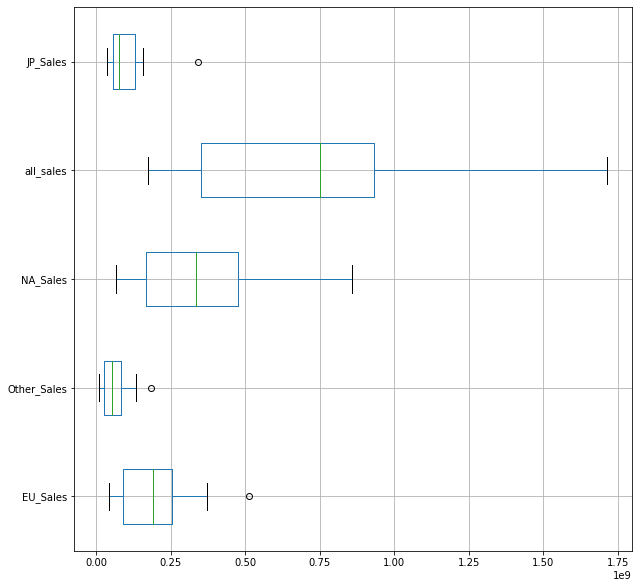

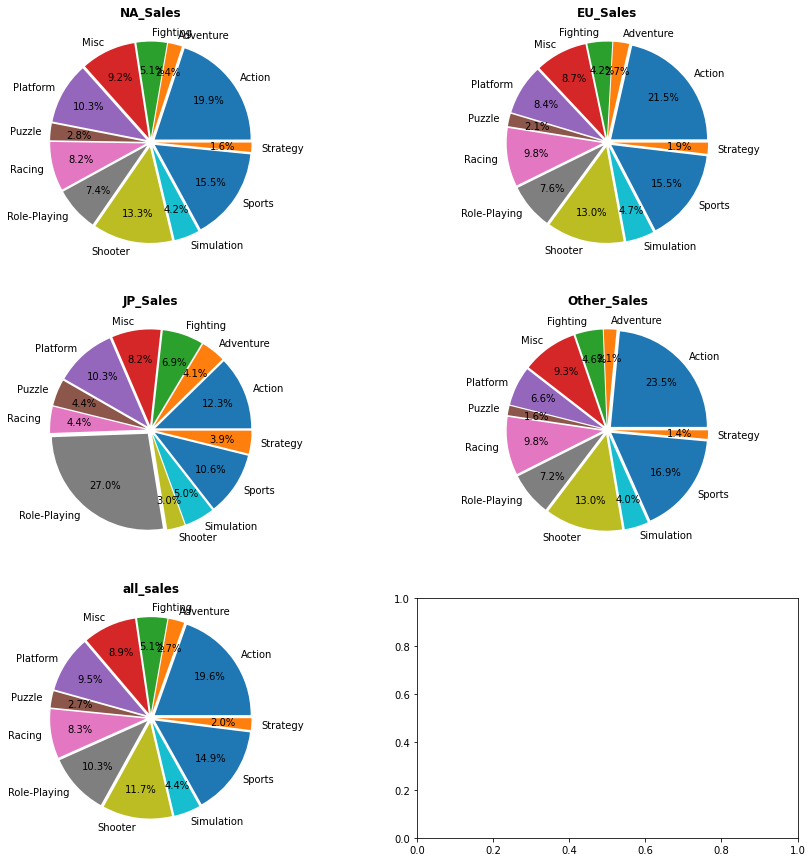

In [7]:
# Q) 지역에 따라서 선호하는 게임 장르가 다를까?
# 파이 차트

import matplotlib.pyplot as plt

df['all_sales'] = df[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}].sum(axis=1)

local = df[{'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','all_sales'}]
gerne = local.groupby(['Genre']).sum()



def draw_local(data):
    fig, axes = plt.subplots(3,2, figsize=(15,15))

    for i, sales in enumerate(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'all_sales']):
        x = i // 2  #정수로 나누기
        y = i % 2
        ax = axes[x][y]
        ax.pie(data[sales], #데이터
               labels=data.index, #라벨
               explode=[0.05] * 12, #각 데이터 파이끼리의 거리두기.
               autopct='%1.1f%%', # 퍼센테이지
               pctdistance=0.70 # 퍼센테이지 중앙부터 얼마만큼 거리 둘지 
               )
        ax.set_title(sales,fontweight='bold') # 제목 두껍게


def sales_rank(data):

    data['all_sales'] = data.sum(axis=1)

    for sales in ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'all_sales']:
        data[ sales+'_rank'] = data[sales].rank(ascending=False)
    return data

def draw_boxplot(data):
    plt.figure(figsize=(10, 10)) # 크기 지정
    data.boxplot(vert=False)


#print(gerne.describe())
draw_boxplot(gerne)

draw_local(gerne)
gerne = sales_rank(gerne)
gerne

             NA_Sales  Other_Sales  JP_Sales  EU_Sales
NA_Sales     1.000000     0.634707  0.449358  0.768906
Other_Sales  0.634707     1.000000  0.285395  0.728084
JP_Sales     0.449358     0.285395  1.000000  0.432350
EU_Sales     0.768906     0.728084  0.432350  1.000000


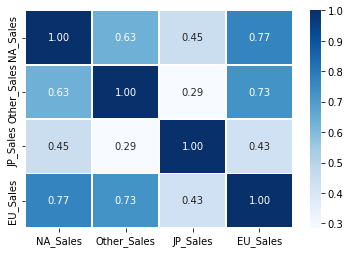

In [8]:
# 출고량 끼리의 상관관계 
all_sales_pca = df[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}]
print(all_sales_pca.corr()) #상관계수

import seaborn as sb
sb.heatmap(data = all_sales_pca.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

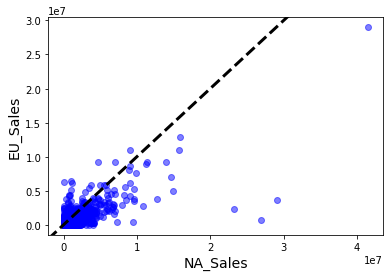

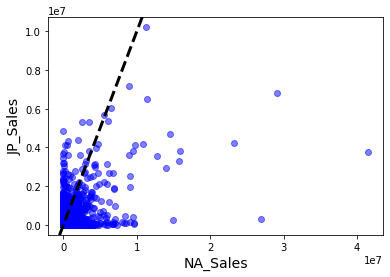

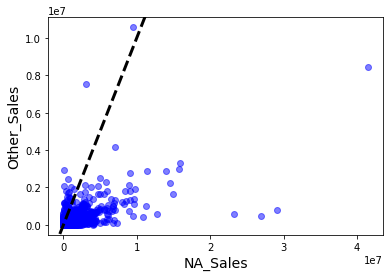

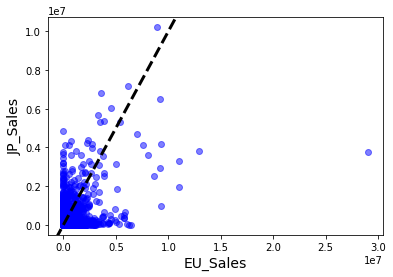

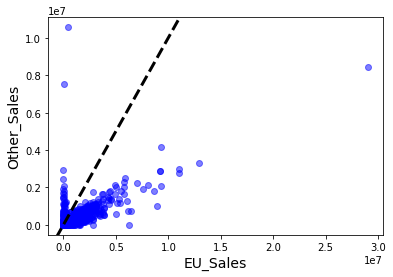

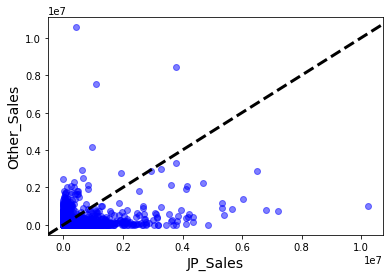

In [9]:
#산점도
from itertools import combinations
arr=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for sale_1, sale_2 in list(combinations(arr,2)):
    plt.axes().set_aspect('auto')
    plt.scatter(sale_1, sale_2, data=df, marker='o', color='blue', alpha=0.5)
    plt.xlabel(sale_1, fontsize=14)
    plt.ylabel(sale_2, fontsize=14)
    xpoints = ypoints = plt.xlim()
    plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
    plt.show()

## Q2) 연도별 게임의 트렌드가 있을까?


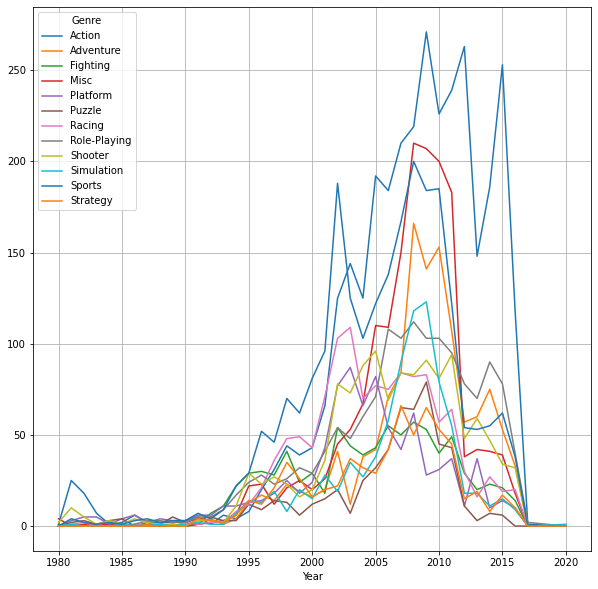

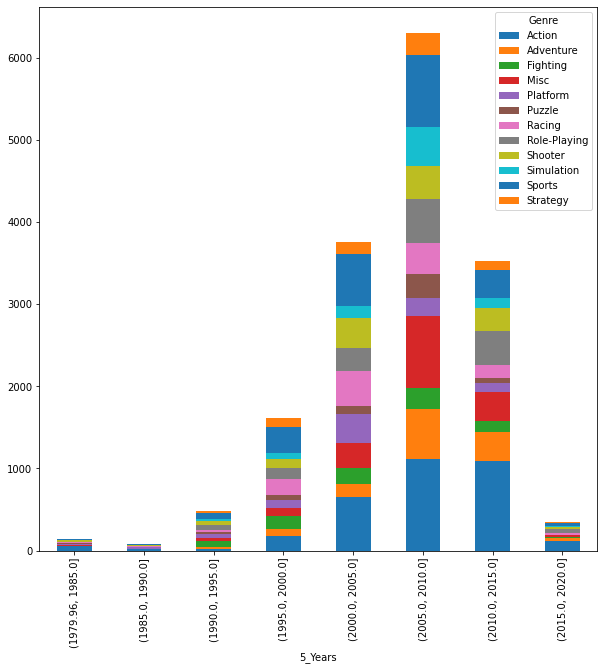

In [10]:
# Q) 연도별 게임의 트렌드가 있을까?

trend = df[{'Year', 'Genre'}]
trend_data = pd.crosstab(trend['Year'],trend['Genre'])
trend_data.plot.line(figsize=(10,10))
plt.grid()

#trend_table = trend.groupby(['Year','Genre']).size().reset_index(name="Count")
trend_data = trend_data.reset_index()

# 년도를 10년 단위로 바꿀 수도 있을듯?
#df.groupby(pd.cut(df.index, np.arange(20, 60, 10))).sum()
#len(trend_data)
#test = df.groupby(pd.cut(trend_data.Year, bins=[1980,1985,1990,1995,2000,2005,2010,2015,2020])).sum()
#test

trend_data['5_Years'] = pd.cut(trend_data.Year, 8)
trend_data = trend_data.drop('Year', axis=1)

#trend_data
years_5 = trend_data.groupby('5_Years').sum()
years_5

years_5.plot.bar(figsize=(10,10), stacked=True)

## Q3) 연도별 게임 플랫폼의 수량

,Year,Platform,Count,rank
158,2008,DS,490,1.0
166,2009,DS,405,2.0
147,2007,DS,377,3.0
173,2010,DS,326,4.0
171,2009,Wii,325,5.0
163,2008,Wii,281,6.0
113,2002,PS2,280,7.0
132,2005,PS2,260,8.0
125,2004,PS2,258,9.5
140,2006,PS2,258,9.5


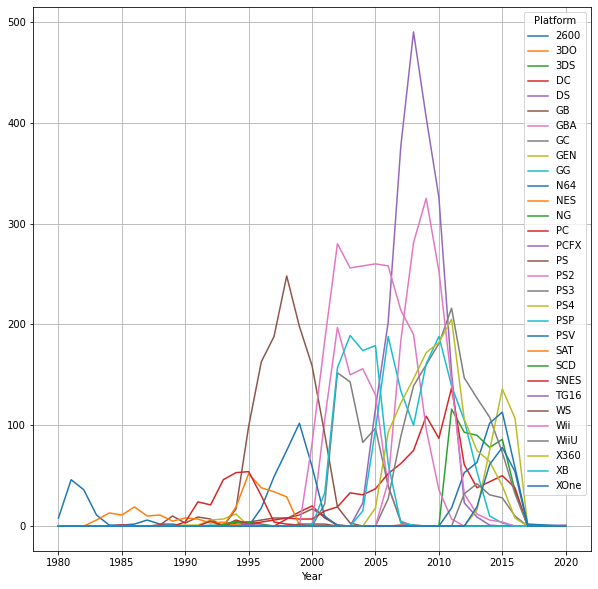

In [11]:
# 연도별 플랫폼 순위.
year_plat = df[{'Year', 'Platform'}]
year_plat_data = pd.crosstab(year_plat['Year'],year_plat['Platform'])
year_plat_data.plot.line(figsize=(10,10))

plt.grid()
year_plat = year_plat.groupby(['Year','Platform']).size().reset_index() #.sort_values(inplace=True)
year_plat.columns = ['Year', 'Platform', 'Count']
year_plat['rank'] = year_plat['Count'].rank(ascending=False)
year_plat = year_plat.sort_values(by = 'rank', axis = 0)
year_plat.head(20)


## Q4) 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [12]:
# 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

df['all_sales'] = df[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}].sum(axis=1)
df['rank'] = df['all_sales'].rank(ascending=False)
df = df.sort_values(by = 'rank', axis = 0)
high_sales = df.head(50)
high_sales


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,all_sales,rank
2908,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000,1.0
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000,2.0
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000,3.0
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000,4.0
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000,5.0
1203,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000,6.0
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000,7.0
3014,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000,8.0
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000,9.0
10488,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000,10.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


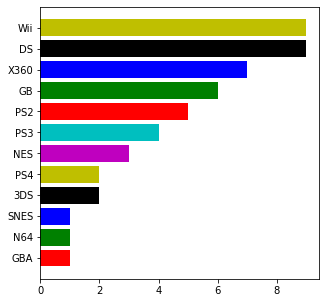

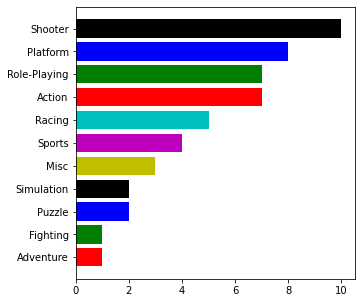

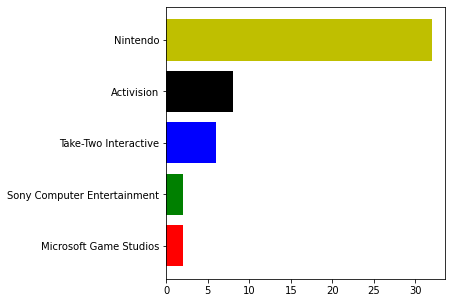

In [13]:
high_platform = high_sales.groupby(['Platform']).size()
high_genre = high_sales.groupby(['Genre']).size()
high_publisher = high_sales.groupby(['Publisher']).size()

def high_draw(data):
    data.sort_values(inplace=True) # 순위별로 정렬
    fig, axes = plt.subplots(1, figsize=(5,5))
    axes.barh(y=data.index, width=data, color='rgbkymc') # 옆으로 바 플롯

high_draw(high_platform)
high_draw(high_genre)
high_draw(high_publisher)

# 결론

### ❓다음 분기에 어떤 게임을 설계해야 할까?

*   증거1. 지역에 따라 선호하는 게임장르  
  
    → 대체적으로 액션, 스포츠 ,슈팅 ( 일본 제외 ) 순위  
    → 일본은 롤플레잉 액션 스포츠 순위  
    → 전체적으로 액션 스포츠 슈팅 롤플레잉 순위  
    → 일본을 제외한 다른 나라들은 추세가 비슷 ( 상관계수 )  

*   증거2. 연도별 게임 트렌드  
    → 2010년도를 기준으로 갯수가 제일 많았다  
    → 전체적으로 액션 게임과 스포츠 게임이 주로 많이 나옴  

*   증거3. 연도별 플랫폼 갯수  
    → 2010년 전으로 ds ,wil, ps 순으로 플랫폼의 갯수가 많았음.

*   증거4. 출고량이 높은 게임에 대한 분석 및 시각화  
    → 닌텐도 게임이 제일 많이 팔렸고, 플랫폼으로는 닌텐도의 wil, ds 가 순위권
    → 장르로는 슈팅와 플랫폼,롤플레잉과 액션 위주.

### ✋ 결론
2가지 정도의 타겟으로 ( 일본과 그 외의 나라 )  
슈팅, 롤플레잉, 플랫폼 위주의 게임으로 플랫폼은 will나 ds를 위주로 게임을 만들면 출고량이 많을 것 같다.


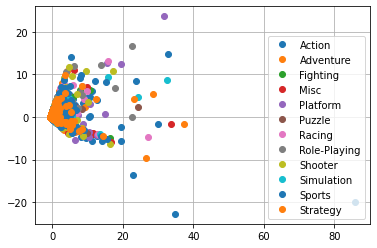

In [14]:
# 출고량을 토대로 PCA 진행

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA

all_sales_pca = df[{'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'}]

scaler = StandardScaler()
Z = scaler.fit_transform(all_sales_pca)

pca = PCA(4)  # PCA 4개
pca.fit(Z)
#ratio = pca.explained_variance_ratio_  
#print("ratio :", ratio)

#pca_data to dataframe
pca_data = pca.transform(Z)
pd_pca_data = pd.DataFrame(pca_data, columns=['PC1','PC2','PC3','PC4']).reset_index(drop=True)
penguins_pca = pd.concat([pd_pca_data,df['Genre']],axis=1) # 제작사 중심으로
groups = penguins_pca.groupby('Genre')

#draw
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.PC1, group.PC2,
            marker='o', linestyle='',
            label=name)
    
ax.legend(fontsize=10, loc='lower right') # legend position
ax.grid()
plt.show();

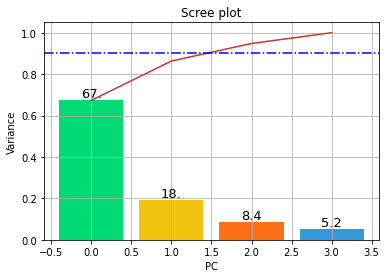

In [15]:
def scree_plot(pca):
    pc_num = len(pca.explained_variance_ratio_)
    index = np.arange(pc_num)
    
    vals = pca.explained_variance_ratio_ 
    
    
    ax = plt.subplot()
    cumvals = np.cumsum(vals)   #누적 합계
    
    ax.bar(index, vals, color = ['#00da75', '#f1c40f',  '#ff6f15', '#3498db']) # Bar plot
    ax.plot(index, cumvals, color = '#c0392b') # Line plot 
    
    for i in range(pc_num): #라벨링(바 위에 텍스트(annotation) 쓰기)
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (index[i], vals[i]), va = "bottom", ha = "center", fontsize = 13)
     
    ax.set_xlabel("PC")
    ax.set_ylabel("Variance")
    plt.grid()
    plt.axhline(y=0.9,color='blue', ls='-.')
    plt.title('Scree plot')
    
scree_plot(pca)

In [16]:
# anova

aa = df[['Genre', 'Publisher','NA_Sales']]


aa
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('NA_Sales ~ C(Genre)', data=aa).fit()
#model = ols('NA_Sales ~ C(Genre) + C(Publisher) + C(Genre):C(Publisher)', data=aa).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,sum_sq,df,F,PR(>F)
C(Genre),1.675983e+14,11.0,22.859221,3.400632e-47
Residual,1.081701e+16,16229.0,NaN,NaN
